#Лабораторная работа № 3

#Введние

В данной лабораторной работе требуется релазиовать MLP для классификации нелинйно разделимых данных.

Шаги выполнения лабораторной работы:
1. Сегерируйте данные (любым методом из sklearn.datasets)
2. Визуализируйте данные на плоскости.
3. Создайте MLP: вход (2 нейрона), скрытый слой (4 нейрона, ReLU), выход(1 нейрон, sigmoid)
4. Разделите данные (80% - обучение, 20% тест)
5. Обучите на 1000 эпох, постройте график потерь
6. Оцените точность на тесте

#Реализация

Импортируем библиотеки

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim

Сгенерируем данные с помощью make_moons из sklearn.datasets

Форма данных: (500, 2)
Количество классов: 2
Баланс классов: [250 250]


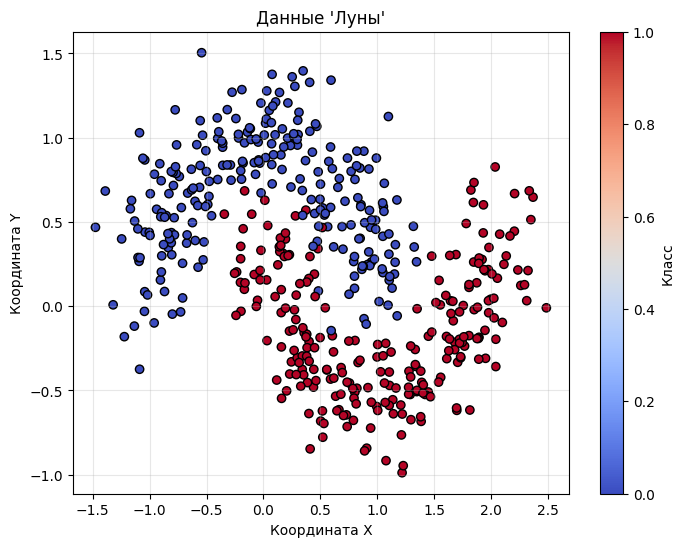

In [ ]:
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)

print(f"Форма данных: {X.shape}")
print(f"Количество классов: {len(np.unique(y))}")
print(f"Баланс классов: {np.bincount(y)}")

# Визуализация данных
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title("Данные 'Луны'")
plt.xlabel("Координата X")
plt.ylabel("Координата Y")
plt.grid(True, alpha=0.3)
plt.colorbar(label='Класс')
plt.show()

Разделим данные на обучающую и тестовую выборки

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Обучающая выборка: {X_train.shape[0]} примеров")
print(f"Тестовая выборка: {X_test.shape[0]} примеров")

Обучающая выборка: 400 примеров
Тестовая выборка: 100 примеров


Стандартизация

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Создание MLP

In [ ]:

class MLP(nn.Module):
    def __init__(self, input_size=2, hidden_size=4, output_size=1):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

model = MLP(input_size=2, hidden_size=4, output_size=1)

Подготовка данных для PyTorch

In [ ]:
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train).reshape(-1, 1)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test).reshape(-1, 1)

Обучение модели

In [ ]:

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

epochs = 1000

for epoch in range(epochs):
    # Обучение
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    # Валидация
    model.eval()
    with torch.no_grad():
        # Потери
        train_outputs = model(X_train_tensor)
        train_loss = criterion(train_outputs, y_train_tensor)
        test_outputs = model(X_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor)

        # Точность
        train_pred = (train_outputs > 0.5).float()
        train_acc = (train_pred == y_train_tensor).float().mean()
        test_pred = (test_outputs > 0.5).float()
        test_acc = (test_pred == y_test_tensor).float().mean()

        train_losses.append(train_loss.item())
        test_losses.append(test_loss.item())
        train_accuracies.append(train_acc.item())
        test_accuracies.append(test_acc.item())

    # Прогресс
    if (epoch + 1) % 100 == 0:
        print(f"Эпоха {epoch+1:4d}/{epochs} | "
              f"Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f} | "
              f"Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")

Эпоха  100/1000 | Train Loss: 0.5542 | Test Loss: 0.5672 | Train Acc: 0.8350 | Test Acc: 0.7900
Эпоха  200/1000 | Train Loss: 0.3029 | Test Loss: 0.3320 | Train Acc: 0.8600 | Test Acc: 0.8400
Эпоха  300/1000 | Train Loss: 0.2909 | Test Loss: 0.3121 | Train Acc: 0.8500 | Test Acc: 0.8400
Эпоха  400/1000 | Train Loss: 0.2793 | Test Loss: 0.2984 | Train Acc: 0.8525 | Test Acc: 0.8400
Эпоха  500/1000 | Train Loss: 0.2639 | Test Loss: 0.2823 | Train Acc: 0.8550 | Test Acc: 0.8600
Эпоха  600/1000 | Train Loss: 0.2431 | Test Loss: 0.2606 | Train Acc: 0.8800 | Test Acc: 0.8700
Эпоха  700/1000 | Train Loss: 0.2309 | Test Loss: 0.2479 | Train Acc: 0.8825 | Test Acc: 0.8800
Эпоха  800/1000 | Train Loss: 0.2253 | Test Loss: 0.2474 | Train Acc: 0.8875 | Test Acc: 0.8800
Эпоха  900/1000 | Train Loss: 0.2221 | Test Loss: 0.2490 | Train Acc: 0.8900 | Test Acc: 0.8900
Эпоха 1000/1000 | Train Loss: 0.2198 | Test Loss: 0.2478 | Train Acc: 0.8900 | Test Acc: 0.8900


График потерь

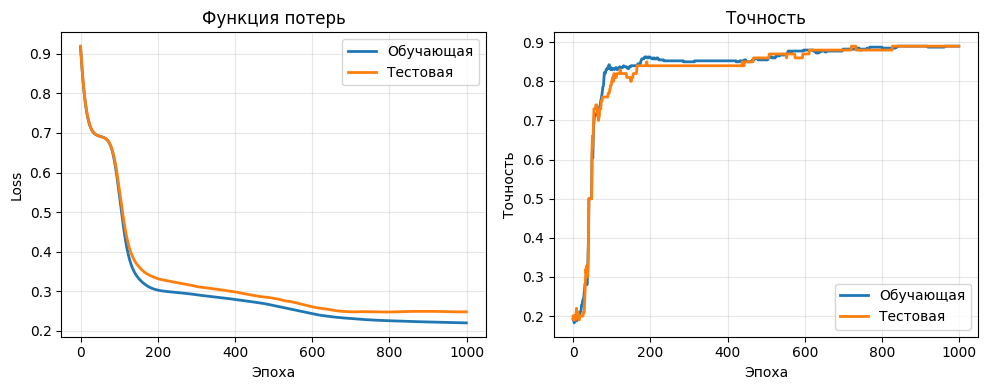

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Обучающая', linewidth=2)
plt.plot(test_losses, label='Тестовая', linewidth=2)
plt.xlabel('Эпоха')
plt.ylabel('Loss')
plt.title('Функция потерь')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Обучающая', linewidth=2)
plt.plot(test_accuracies, label='Тестовая', linewidth=2)
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.title('Точность')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Оценка точности

In [ ]:
model.eval()
with torch.no_grad():
    # Предсказания на тесте
    test_outputs = model(X_test_tensor)
    test_pred = (test_outputs > 0.5).float()

    # Метрики
    accuracy = (test_pred == y_test_tensor).float().mean()

    # Матрица ошибок
    tp = ((test_pred == 1) & (y_test_tensor == 1)).sum().item()
    tn = ((test_pred == 0) & (y_test_tensor == 0)).sum().item()
    fp = ((test_pred == 1) & (y_test_tensor == 0)).sum().item()
    fn = ((test_pred == 0) & (y_test_tensor == 1)).sum().item()

print(f"Точность на тестовой выборке: {accuracy:.4f}")
print(f"\nМатрица ошибок:")
print(f"True Positive (TP): {tp}")
print(f"True Negative (TN): {tn}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"\nОбщая точность: {(tp + tn) / (tp + tn + fp + fn):.4f}")

Точность на тестовой выборке: 0.8900

Матрица ошибок:
True Positive (TP): 42
True Negative (TN): 47
False Positive (FP): 3
False Negative (FN): 8

Общая точность: 0.8900


#Заключение

Проделав лабораторную работу, можно сделать вывод, что многослойный перцептрон успешно решает задачу классификации нелинейно разделимых данных. Модель достигла точности 89% на тестовой выборке данных make_moons, что подтверждает её способность находить сложные разделяющие границы.